In [146]:
#Correlational Analysis Model Sleep Quality on Fitness Metric Outcomes (Sleep Duration/Time in Bed)

In [147]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [148]:
# Load datasets
minute_sleep_data = pd.read_csv('/Users/jamesmoy/Desktop/Sleep Fitness Data/Fitabase Data 4.12.16-5.12.16//minuteSleep_merged.csv')
daily_activity_data = pd.read_csv('/Users/jamesmoy/Desktop/Sleep Fitness Data/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')
hourly_intensities_data = pd.read_csv('/Users/jamesmoy/Desktop/Sleep Fitness Data/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv')
hourly_steps_data = pd.read_csv('/Users/jamesmoy/Desktop/Sleep Fitness Data/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv')
# Load the sleep day dataset (already standardized and cleaned)
sleep_day_data = pd.read_csv('/Users/jamesmoy/Desktop/Sleep Fitness Data/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv')

In [149]:
# Data Cleaning
# Standardize column names
minute_sleep_data.columns = minute_sleep_data.columns.str.lower().str.replace(' ', '_')
daily_activity_data.columns = daily_activity_data.columns.str.lower().str.replace(' ', '_')
hourly_intensities_data.columns = hourly_intensities_data.columns.str.lower().str.replace(' ', '_')
hourly_steps_data.columns = hourly_steps_data.columns.str.lower().str.replace(' ', '_')
sleep_day_data.columns = sleep_day_data.columns.str.lower().str.replace(' ', '_')

In [150]:
# Ensure datetime columns are in a consistent and usable format
minute_sleep_data['date'] = pd.to_datetime(minute_sleep_data['date'], errors='coerce', format='%m/%d/%Y %I:%M:%S %p')
daily_activity_data['activitydate'] = pd.to_datetime(daily_activity_data['activitydate'], errors='coerce', format='%m/%d/%Y')
hourly_intensities_data['activityhour'] = pd.to_datetime(hourly_intensities_data['activityhour'], errors='coerce', format='%m/%d/%Y %I:%M:%S %p')
hourly_steps_data['activityhour'] = pd.to_datetime(hourly_steps_data['activityhour'], errors='coerce', format='%m/%d/%Y %I:%M:%S %p')
sleep_day_data['sleepday'] = pd.to_datetime(sleep_day_data['sleepday'], errors='coerce', format='%m/%d/%Y %I:%M:%S %p')

In [151]:
# Handle missing values (drop rows with missing datetime or key columns)
minute_sleep_data.dropna(subset=['date'], inplace=True)
daily_activity_data.dropna(subset=['activitydate'], inplace=True)
hourly_intensities_data.dropna(subset=['activityhour'], inplace=True)
hourly_steps_data.dropna(subset=['activityhour'], inplace=True)
sleep_day_data.dropna(subset=['sleepday'], inplace=True)

In [152]:
# Aggregating sleep data to daily level
daily_sleep_data = minute_sleep_data.groupby(['id', minute_sleep_data['date'].dt.date])['value'].sum().reset_index()
daily_sleep_data.rename(columns={'value': 'total_sleep_duration', 'date': 'activitydate'}, inplace=True)


In [153]:
# Convert 'activitydate' to datetime format in daily_sleep_data to match the type in daily_activity_data
daily_sleep_data['activitydate'] = pd.to_datetime(daily_sleep_data['activitydate'], format='%Y-%m-%d')


In [154]:
# Aggregating hourly data to daily level for intensities and steps
daily_intensities_data = hourly_intensities_data.groupby(['id', hourly_intensities_data['activityhour'].dt.date])[
    ['totalintensity', 'averageintensity']].sum().reset_index()
daily_intensities_data.rename(columns={'activityhour': 'activitydate'}, inplace=True)

daily_steps_data = hourly_steps_data.groupby(['id', hourly_steps_data['activityhour'].dt.date])['steptotal'].sum().reset_index()
daily_steps_data.rename(columns={'activityhour': 'activitydate'}, inplace=True)


In [155]:
# Aggregating hourly data to daily level for intensities and steps
daily_intensities_data = hourly_intensities_data.groupby(['id', hourly_intensities_data['activityhour'].dt.date])[
    ['totalintensity', 'averageintensity']].sum().reset_index()
daily_intensities_data.rename(columns={'activityhour': 'activitydate'}, inplace=True)

daily_steps_data = hourly_steps_data.groupby(['id', hourly_steps_data['activityhour'].dt.date])['steptotal'].sum().reset_index()
daily_steps_data.rename(columns={'activityhour': 'activitydate'}, inplace=True)


In [156]:
# Merging datasets on Id and date
# Merge sleep data with daily activity data on 'id' and 'activitydate'
merged_daily_data = pd.merge(daily_sleep_data, daily_activity_data, on=['id', 'activitydate'], how='inner')


In [157]:
# Ensure 'activitydate' columns are of the same data type in all dataframes before merging
daily_intensities_data['activitydate'] = pd.to_datetime(daily_intensities_data['activitydate'])
daily_steps_data['activitydate'] = pd.to_datetime(daily_steps_data['activitydate'])
merged_daily_data['activitydate'] = pd.to_datetime(merged_daily_data['activitydate'])


In [158]:
# Merge the aggregated intensities and steps data with the existing merged_daily_data
merged_daily_data = pd.merge(merged_daily_data, daily_intensities_data, on=['id', 'activitydate'], how='inner')
merged_daily_data = pd.merge(merged_daily_data, daily_steps_data, on=['id', 'activitydate'], how='inner')


In [159]:
# Merge with sleepDay_merged to include sleep quality metrics
sleep_day_data['sleep_quality'] = sleep_day_data['totalminutesasleep'] / sleep_day_data['totaltimeinbed']
sleep_day_data = sleep_day_data[['id', 'sleepday', 'sleep_quality']]
sleep_day_data.rename(columns={'sleepday': 'activitydate'}, inplace=True)
sleep_day_data['activitydate'] = pd.to_datetime(sleep_day_data['activitydate'], format='%Y-%m-%d')


In [160]:
# Merge sleep quality data with merged_daily_data
merged_daily_data = pd.merge(merged_daily_data, sleep_day_data, on=['id', 'activitydate'], how='inner')


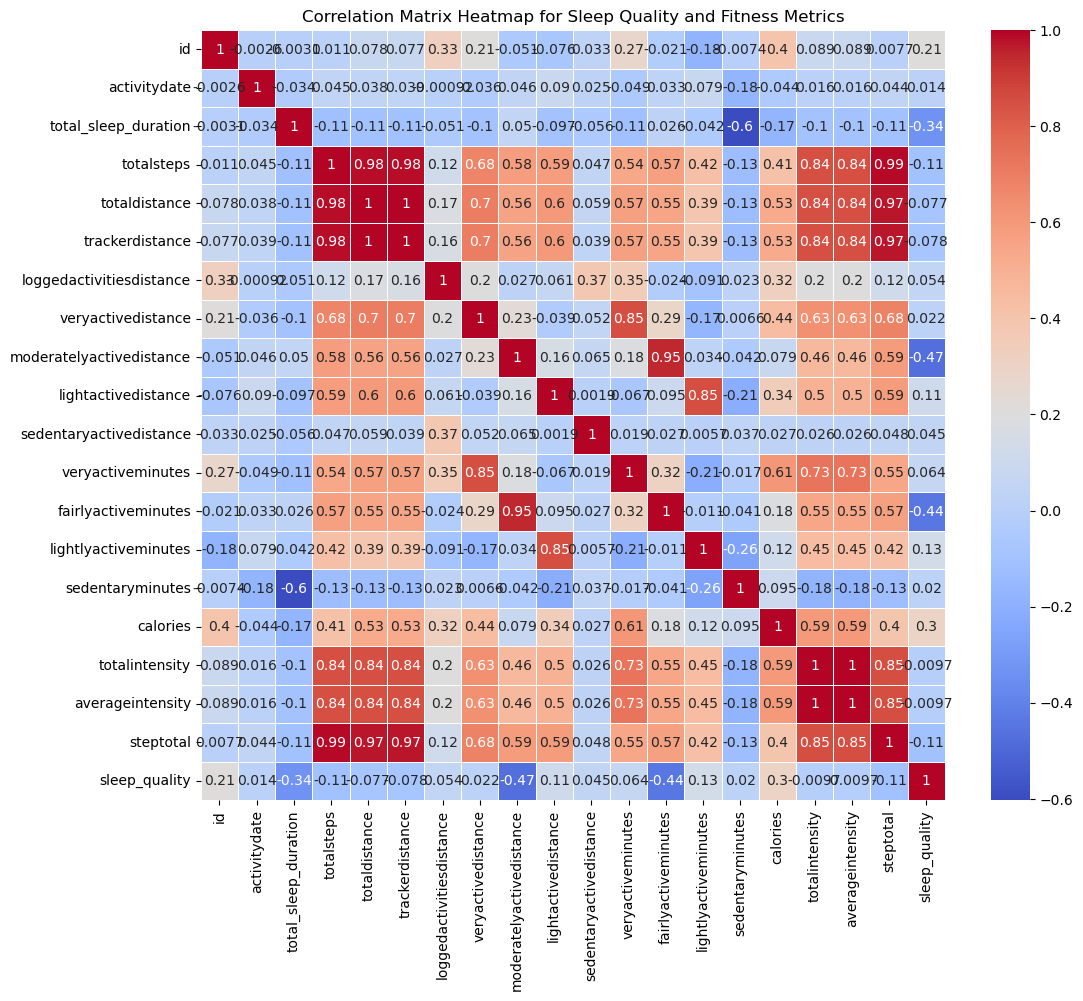


Correlation Analysis Summary:

Strong correlations for total_sleep_duration:
total_sleep_duration    1.000000
sedentaryminutes       -0.602755
Name: total_sleep_duration, dtype: float64


Strong correlations for totalsteps:
totalsteps                  1.000000
steptotal                   0.990935
trackerdistance             0.981652
totaldistance               0.981533
totalintensity              0.844594
averageintensity            0.844594
veryactivedistance          0.677084
lightactivedistance         0.586532
moderatelyactivedistance    0.581008
fairlyactiveminutes         0.569649
veryactiveminutes           0.540876
Name: totalsteps, dtype: float64


Strong correlations for totaldistance:
totaldistance               1.000000
trackerdistance             0.999561
totalsteps                  0.981533
steptotal                   0.970748
totalintensity              0.844670
averageintensity            0.844670
veryactivedistance          0.702748
lightactivedistance         0.59766

In [161]:
# Check if merged_daily_data is empty
if merged_daily_data.empty:
    print("Merged dataset is empty. Please check the merge conditions or the data alignment.")
else:
    # Generate Correlation Matrix
    correlation_matrix = merged_daily_data.corr(method='pearson')

    # Check if correlation matrix contains valid data
    if correlation_matrix.isnull().values.all():
        print("Correlation matrix contains only NaN values. Please check the data for issues.")
    else:
        # Heatmap Visualization
        plt.figure(figsize=(12, 10))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
        plt.title('Correlation Matrix Heatmap for Sleep Quality and Fitness Metrics')
        plt.show()

        # Interpretation of Correlation Matrix
        print("\nCorrelation Analysis Summary:\n")
        for column in correlation_matrix.columns:
            strong_correlations = correlation_matrix[column][(correlation_matrix[column] > 0.5) | (correlation_matrix[column] < -0.5)].sort_values(ascending=False)
            if len(strong_correlations) > 1:  # Exclude self-correlation
                print(f"Strong correlations for {column}:")
                print(strong_correlations)
                print("\n")

        # Interpretation specifically for sleep quality metrics
        if 'sleep_quality' in correlation_matrix.columns:
            sleep_quality_correlations = correlation_matrix['sleep_quality'][(correlation_matrix['sleep_quality'] > 0.5) | (correlation_matrix['sleep_quality'] < -0.5)].sort_values(ascending=False)
            print("\nStrong correlations for sleep_quality:")
            print(sleep_quality_correlations)
            print("\n")
        else:
            print("Sleep quality metric not found in correlation matrix.")